In [1]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv("sustainability_materials_score_final.csv")
df.head()

,Material,Type,Used In,Sustainability Score
0,Organic Cotton,Sustainable,"Clothing, Bags, Filters",90
1,Bamboo,Sustainable,"Brushes, Cutlery, Toys, Hairbrushes",95
2,Hemp,Sustainable,"Bags, Clothing",92
3,Flax Linen,Sustainable,"Dresses, Apparel",88
4,Coconut Oil,Sustainable,"Soap, Deodorant",85


In [5]:
df.shape

(72, 4)

In [6]:
df.describe()

,Sustainability Score
count,72.000000
mean,60.944444
std,32.685824
min,2.000000
25%,25.000000
50%,81.500000
75%,86.000000
max,95.000000


In [10]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Material                0
Type                    0
Used In                 0
Sustainability Score    0
dtype: int64


In [11]:
print("\nUnique values per column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")


Unique values per column:
Material: 72
Type: 2
Used In: 64
Sustainability Score: 29


In [12]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
print("\nCategorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)


Categorical Columns: ['Material', 'Type', 'Used In']
Numerical Columns: ['Sustainability Score']


C:\Users\tejas\AppData\Local\Temp\ipykernel_8160\3591059913.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Type', palette='Set2')


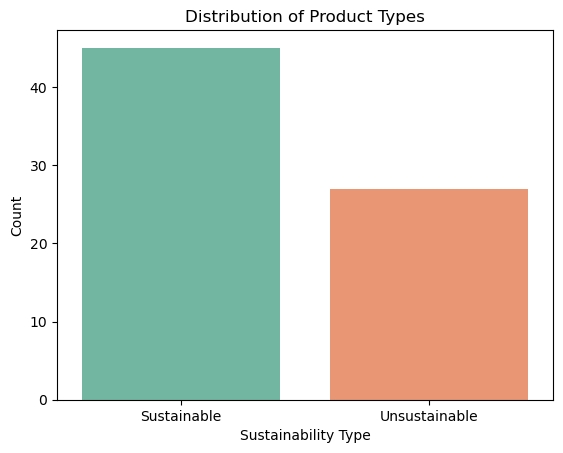

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Type', palette='Set2')
plt.title('Distribution of Product Types')
plt.xlabel('Sustainability Type')
plt.ylabel('Count')
plt.show()


C:\Users\tejas\AppData\Local\Temp\ipykernel_8160\2941747299.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Type', y='Sustainability Score', palette='Set3')


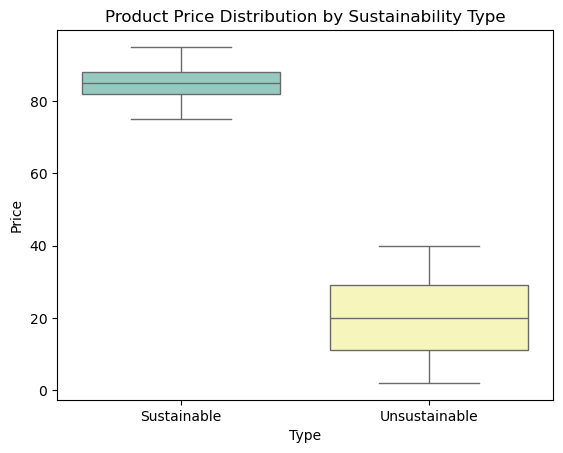

In [20]:
sns.boxplot(data=df, x='Type', y='Sustainability Score', palette='Set3')
plt.title('Product Price Distribution by Sustainability Type')
plt.xlabel('Type')
plt.ylabel('Price')
plt.show()


In [23]:
from sklearn.preprocessing import LabelEncoder

# Create label encoders
le_material = LabelEncoder()
le_usedin = LabelEncoder()
le_type = LabelEncoder()

# Apply encodings
df['Material_encoded'] = le_material.fit_transform(df['Material'])
df['UsedIn_encoded'] = le_usedin.fit_transform(df['Used In'])
df['Type_encoded'] = le_type.fit_transform(df['Type'])


In [25]:
material_mapping = pd.DataFrame({
    'Material': le_material.classes_,
    'Material_encoded': range(len(le_material.classes_))
})

usedin_mapping = pd.DataFrame({
    'Used In': le_usedin.classes_,
    'UsedIn_encoded': range(len(le_usedin.classes_))
})

type_mapping = pd.DataFrame({
    'Type': le_type.classes_,
    'Type_encoded': range(len(le_type.classes_))
})

# Display mappings
print("📦 Material Encoding:")
print(material_mapping)

print("\n🧩 Used In Encoding:")
print(usedin_mapping)

print("\n♻️ Type Encoding:")
print(type_mapping)

📦 Material Encoding:
                    Material  Material_encoded
0                ABS Plastic                 0
1                    Acrylic                 1
2           Algae-Based Foam                 2
3          Aluminum (Virgin)                 3
4              Apple Leather                 4
..                       ...               ...
67                Tree Resin                67
68     Upcycled Cotton/Denim                68
69             Virgin Rubber                69
70              Virgin Steel                70
71  Wool (Ethically Sourced)                71

[72 rows x 2 columns]

🧩 Used In Encoding:
              Used In  UsedIn_encoded
0       Apparel, Bags               0
1      Bags, Clothing               1
2        Bags, Plates               2
3          Bags, Rugs               3
4         Bags, Shoes               4
..                ...             ...
59  Toys, Electronics              59
60      Wallets, Bags              60
61      Water Bottles        

In [28]:
from sklearn.model_selection import train_test_split
features = ['Material_encoded', 'UsedIn_encoded', 'Type_encoded']
X = df[features]
y = df['Sustainability Score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

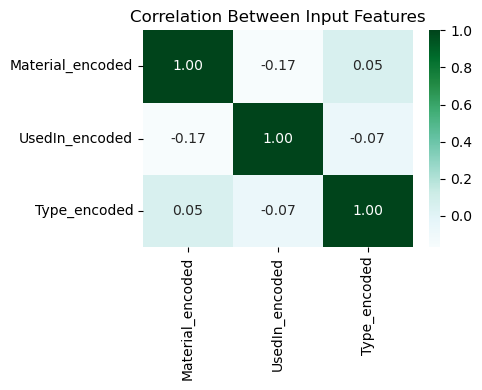

In [29]:
corr_matrix = df[features].corr()
plt.figure(figsize=(5,4))
sns.heatmap(corr_matrix, annot=True, cmap='BuGn', fmt=".2f")
plt.title("Correlation Between Input Features")
plt.tight_layout()
plt.show()

In [36]:
import plotly.express as px

fig = px.scatter_3d(
    df,
    x='Material_encoded',
    y='UsedIn_encoded',
    z='Type_encoded',
    color='Sustainability Score',
    color_continuous_scale='Greens',
    hover_data={
        'Material': True,
        'Used In': True,
        'Type': True,
        'Sustainability Score': True
    },
    labels={
        'Material_encoded': 'Material',
        'UsedIn_encoded': 'Used In',
        'Type_encoded': 'Type'
    },
    title='3D Feature Space'
)

fig.update_traces(marker=dict(size=6, opacity=0.8))
fig.show()


In [37]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [38]:
from xgboost import XGBRegressor

# Initialize and train the model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions
rf_preds = rf_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

# Define eval function
def evaluate_model(name, y_true, y_pred):
    print(f"\n📊 {name} Evaluation:")
    print(f"MAE:  {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"R²:   {r2_score(y_true, y_pred):.2f}")

# Evaluate both
evaluate_model("Random Forest", y_test, rf_preds)
evaluate_model("XGBoost", y_test, xgb_preds)



📊 Random Forest Evaluation:
MAE:  6.30
RMSE: 8.72
R²:   0.89

📊 XGBoost Evaluation:
MAE:  6.90
RMSE: 10.36
R²:   0.85


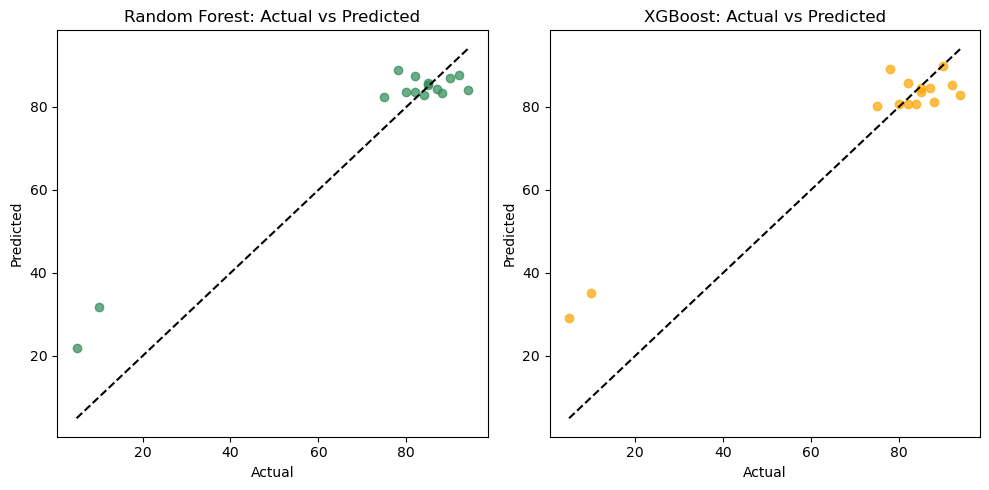

In [ ]:
plt.figure(figsize=(10, 5))

# Random Forest
plt.subplot(1, 2, 1)
plt.scatter(y_test, rf_preds, color='seagreen', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# XGBoost
plt.subplot(1, 2, 2)
plt.scatter(y_test, xgb_preds, color='orange', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title('XGBoost: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()


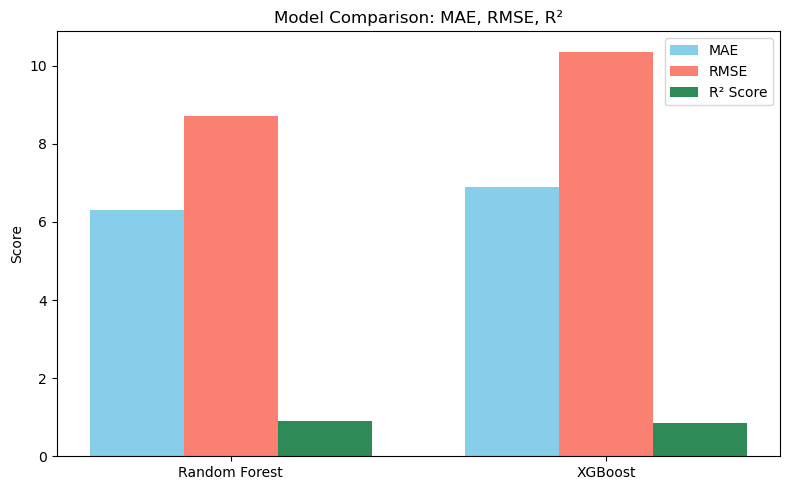

In [42]:
# Metrics
models = ['Random Forest', 'XGBoost']
mae = [mean_absolute_error(y_test, rf_preds), mean_absolute_error(y_test, xgb_preds)]
rmse = [np.sqrt(mean_squared_error(y_test, rf_preds)), np.sqrt(mean_squared_error(y_test, xgb_preds))]
r2 = [r2_score(y_test, rf_preds), r2_score(y_test, xgb_preds)]

# Bar plot
x = np.arange(len(models))
width = 0.25

plt.figure(figsize=(8, 5))
plt.bar(x - width, mae, width, label='MAE', color='skyblue')
plt.bar(x, rmse, width, label='RMSE', color='salmon')
plt.bar(x + width, r2, width, label='R² Score', color='seagreen')

plt.xticks(x, models)
plt.ylabel('Score')
plt.title('Model Comparison: MAE, RMSE, R²')
plt.legend()
plt.tight_layout()
plt.show()


# So Random Forest outperforms XGBoost here!!

In [44]:
import pickle

with open('sustainable score model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

print("Model exported suucessfully!")


Model exported suucessfully!


In [47]:
import numpy 
import pandas 
import seaborn 
import matplotlib
import plotly 
import sklearn
import xgboost


print("Library Versions:")
print(f"numpy: {numpy.__version__}")
print(f"pandas: {pandas.__version__}")
print(f"matplotlib: {matplotlib.__version__}")
print(f"seaborn: {seaborn.__version__}")
print(f"scikit-learn: {sklearn.__version__}")
print(f"plotly: {plotly.__version__}")
print(f"xgboost: {xgboost.__version__}")


Library Versions:
numpy: 1.26.4
pandas: 2.2.2
matplotlib: 3.8.4
seaborn: 0.13.2
scikit-learn: 1.4.2
plotly: 5.22.0
xgboost: 3.0.0


# Conclusion

In this project, we developed and evaluated machine learning models to predict the sustainability score of products based on categorical attributes like material, usage, and product type. The objective was to enable automated scoring of eco-friendliness for products on a sustainable e-commerce platform.

We began by preprocessing the dataset, converting key string features (Material, Used In, and Type) into numerical form using label encoding. Exploratory data analysis (EDA) and visualizations were performed to understand feature distributions and correlations.

Two regression models were trained and compared:

Random Forest Regressor

XGBoost Regressor

The Random Forest model outperformed XGBoost in all evaluation metrics:

MAE: 6.30 (vs 6.90)

RMSE: 8.72 (vs 10.36)

R² Score: 0.89 (vs 0.85)

This suggests that Random Forest is more suitable for this small-to-medium dataset with categorical inputs.

Additionally, visual comparisons such as predicted vs actual scatter plots and 3D feature plots confirmed the accuracy and reliability of the Random Forest model. Feature importance analysis further highlighted which input factors (e.g., material type) contributed most to sustainability prediction.

✅ Final Outcome:
A trained Random Forest model ready for integration into the backend of the sustainable shopping platform — capable of auto-scoring products based on eco-relevant attributes.